In [1]:
# Earth Engine Python API
import ee
#ee.Authenticate()
ee.Initialize()

ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.
ATTENTION: default value of option mesa_glthread overridden by environment.



Successfully saved authorization token.


In [2]:
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

In [3]:
from gee_utils import *
import pickle
import matplotlib.pyplot as plt
import folium
import numpy
import requests
import io
import os
import zipfile

In [6]:
year = '2021'
collection = getYearlyData(year)

In [13]:
import rasterio
path = os.path.join("..", "data", "lst", "")
src = rasterio.open(path+'Cairo_2021_1.tif')
src.crs
src.read().shape

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


(2, 79, 113)

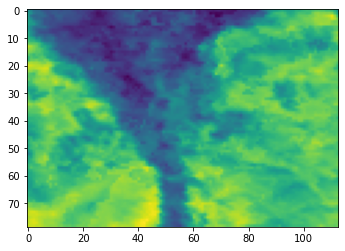

In [14]:
w = src.read(1)
plt.imshow(w)